In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon, Patch
import numpy as np

In [2]:
data = pd.read_csv("DATA.csv")
data.drop(['Unnamed: 0'], inplace=True, axis=1)
data.head()

,time,latitude,longitude,depth,mag
0,2021-12-01T04:09:14.807Z,35.2280,141.4204,10.00,4.7
1,2021-12-01T04:49:28.304Z,35.2774,141.5336,10.00,4.7
2,2021-12-01T04:56:33.657Z,33.7690,137.1036,362.75,4.0
3,2021-12-01T05:08:33.848Z,35.2014,141.4165,10.00,4.5
4,2021-12-01T06:04:53.753Z,35.1430,141.3281,10.00,4.9


In [3]:
from collections import namedtuple

Coords = namedtuple("Coords", "lat_min lat_max lon_min lon_max")
zones = {"A": Coords(41, 46, 140, 146), "B": Coords(37, 41, 138, 142), "C": Coords(34, 37, 137, 141), "D": Coords(33, 37, 133, 137), "E": Coords(31, 36, 129, 133), "F": Coords(38, 41, 142, 144), "G": Coords(36, 38, 141, 143)}

def to_5_zone(lat: float, lon: float):
    """Convert coordinates to a zone number according to the map arrangement above"""
    for zone, coord in zones.items():
        if (coord.lat_min <= lat <= coord.lat_max) & (coord.lon_min <= lon <= coord.lon_max):
            return zone
    return 0

In [4]:
data["zone"] = data.apply(lambda x: to_5_zone(x['latitude'], x['longitude']), axis=1)

In [18]:
d_colors = {}
colors = ["firebrick", "sandybrown", "orange", "palegreen", "slateblue", "purple", "crimson"]
for i, k in enumerate(list("ABCDEFG")):
    d_colors[k] = colors[i]

In [5]:
from matplotlib.patches import Polygon

def draw_screen_poly( lats, lons, m, facecolor='red', alpha=.1):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor=facecolor, alpha=alpha)
    plt.gca().add_patch(poly)

In [31]:
def plot_map(data, var: str, grid=False, add_cities=False, show_poly=False, show_zones=False):
    """val: column name of the variable to plot"""
    fig = plt.figure(figsize=(14, 14))
    #m = Basemap(projection='lcc', resolution=None, lat_1=35.5, lat_2=42, lat_0=38, lon_0=140, width=2.1E6, height=2.1E6,)
    m = Basemap(projection='cyl',llcrnrlat=30,urcrnrlat=46, 
                llcrnrlon=129,urcrnrlon=149)
    m.shadedrelief()
    xpt, ypt = m(data.longitude, data.latitude)
    m.scatter(xpt, ypt, s = data[var].values, c = data[var].values)

    if grid:
        m.drawparallels(np.arange(int(30),int(47),1),labels=[1,0,0,0])
        m.drawmeridians(np.arange(int(129),int(149),1),labels=[0,0,0,1])

    if add_cities:
        xpt,ypt = m(cities.Longitude,cities.Latitude)
        # convert back to lat/lon
        #lonpt, latpt = m(xpt,ypt,inverse=True)
        m.plot(xpt,ypt,'rx')  # plot a blue dot there
        # put some text next to the dot, offset a little bit
        # (the offset is in map projection coordinates)
        #plt.text(xpt+100000,ypt+100000, cities.city)

    if show_poly:
        
        # polygon in map coordinates
        #lats = np.linspace(30, 47, 40)
        #lons = np.linspace(129, 150, 40)
        draw_screen_poly(lats, lons, m)

    if show_zones:
        patches = []
        for z, col in d_colors.items():
            coord = zones[z]
            lats = [coord.lat_min, coord.lat_max, coord.lat_max, coord.lat_min]
            lons = [coord.lon_min, coord.lon_min, coord.lon_max, coord.lon_max]
            draw_screen_poly(lats, lons, m, col, .3)
            patch = Patch(color=col, label=f'zone {z}')
            patches.append(patch)

    plt.legend(handles=patches)
    plt.title("Geographic Breakdown")
    plt.plot()

MemoryError: Unable to allocate 667. MiB for an array with shape (5400, 10800, 3) and data type float32

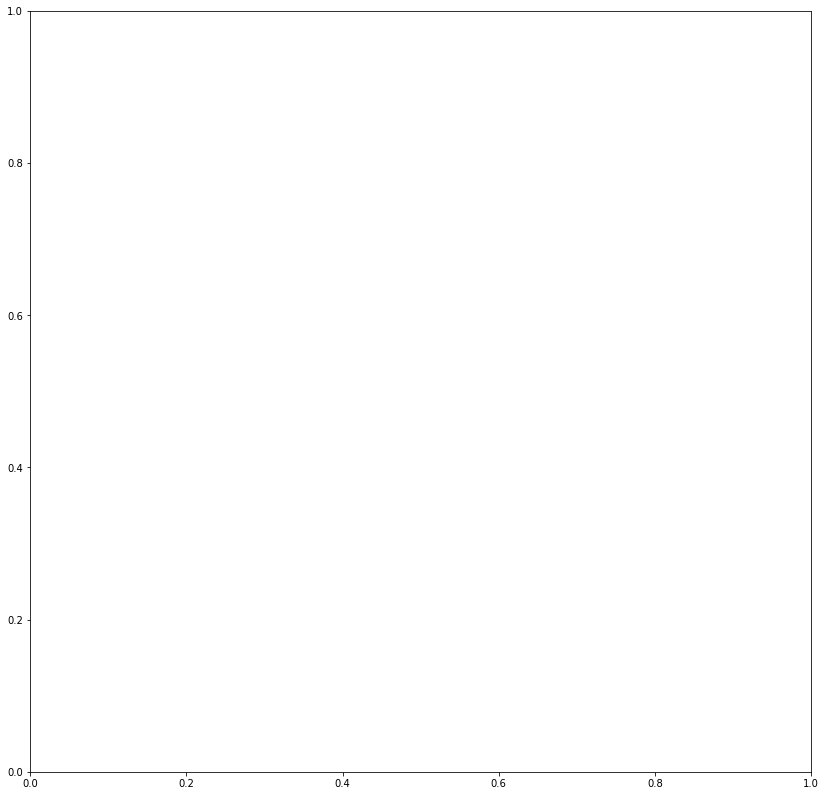

In [34]:
plot_map(data[data.mag > 6], 'mag', grid=True, show_zones=True)